# Figure 9

\texttt{Inaccuracy} of the active predictors and distribution of predictions with respect to their parameters $w$ or $f$. Top row: The distribution of the \texttt{Inaccuracy} of the active predictors for continuous (left) and cyclic (right) types with respect to the values of their parameters $w$ and $f$. The width of the boxes encodes the number of predictors of the respective $w$ and $f$. Each datapoint corresponds to the inaccuracy of a predictor in one of the last 20 rounds of an arbitrary trial. Bottom row: The plots show the distribution of all possible predictions based on a history of length corresponding to the value of either $w$ or $f$, for continuous (left) and cyclic (right) type of predictors.

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../el_farol')

from main import main
from config import PATHS

In [116]:
ks = [12]
df = main(
    ks=ks,
    ds=[24],
    num_rounds=100,
    num_experiments=50,
    seed=42
)

Running memory sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

In [117]:
df['Policy_type'] = df['Policy'].apply(lambda x: x.split('-')[1])
df['Policy_window'] = df['Policy'].apply(lambda x: x.split('-')[0]).astype(int)
df['Policy_mirror'] = df['Policy'].apply(lambda x: len(x.split('-')) == 3)
df1 = df[df['Policy_type'] == 'window']
df1 = df1[df1['Policy_mirror'] == False]
df2 = df[df['Policy_type'] == 'cyclic']
df2 = df2[df2['Policy_mirror'] == False]

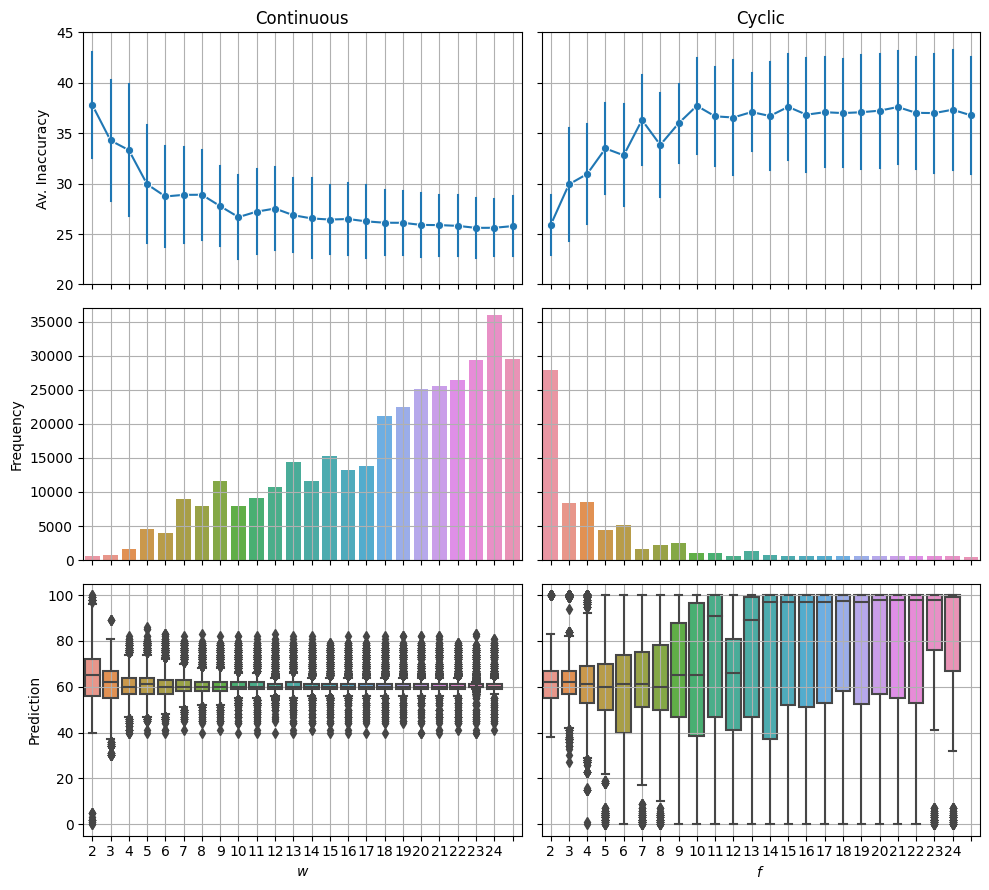

In [136]:
fig, axes = plt.subplots(
    3, 2, 
    figsize=(10,9), 
    tight_layout=True,
)

# Top row
sns.lineplot(
    x='Policy_window',
    y='Inaccuracy',
    data=df1,
    markers=True,
    marker='o',
    errorbar='sd',
    err_style="bars",
    ax=axes[0,0]
)
axes[0,0].set_title('Continuous')
axes[0,0].set_ylabel('Av. Inaccuracy')
axes[0,0].set_ylim(20,45)
axes[0,0].set_xlabel('')
axes[0,0].set_xlim(0.5,24.5)
axes[0,0].set_xticks(list(range(1, 25)))
axes[0,0].tick_params(labelbottom=False)
axes[0,0].grid()

sns.lineplot(
    x='Policy_window',
    y='Inaccuracy',
    data=df2,
    markers=True,
    marker='o',
    errorbar='sd',
    err_style="bars",
    ax=axes[0,1]
)
axes[0,1].set_title('Cyclic')
axes[0,1].set_ylim(20,45)
axes[0,1].set_ylabel('')
axes[0,1].set_xlabel('')
axes[0,1].set_xlim(0.5,24.5)
axes[0,1].set_xticks(list(range(1, 25)))
axes[0,1].tick_params(labelleft=False)
axes[0,1].tick_params(labelbottom=False)
axes[0,1].grid()

# Center row
dfC1 = df1['Policy_window'].value_counts().reset_index()
sns.barplot(
    x='index',
    y='Policy_window',
    data=dfC1,
    ax=axes[1,0],
)
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_xlabel('')
axes[1,0].tick_params(labelbottom=False)
axes[1,0].set_ylim(0,37000)
axes[1,0].grid()

dfC2 = df2['Policy_window'].value_counts().reset_index()
sns.barplot(
    x='index',
    y='Policy_window',
    data=dfC2,
    ax=axes[1,1],
)
axes[1,1].set_ylabel('')
axes[1,1].set_xlabel('')
axes[1,1].tick_params(labelbottom=False)
axes[1,1].tick_params(labelleft=False)
axes[1,1].set_ylim(0,37000)
axes[1,1].grid()

# Bottom row
sns.boxplot(
    x='Policy_window',
    y='Prediction',
    data=df1,
    ax=axes[2,0]
)
axes[2,0].set_title('')
axes[2,0].set_xlabel('$w$')
axes[2,0].set_ylabel('Prediction')
axes[2,0].set_ylim(-5,105)
axes[2,0].set_xlim(0.5,24.5)
axes[2,0].set_xticks(list(range(1, 25)))
axes[2,0].grid()

sns.boxplot(
    x='Policy_window',
    y='Prediction',
    data=df2,
    ax=axes[2,1],
)
axes[2,1].set_title('')
axes[2,1].set_ylabel('')
axes[2,1].set_ylim(-5,105)
axes[2,1].set_xlabel('$f$')
axes[2,1].set_xlim(0.5,24.5)
axes[2,1].set_xticks(list(range(1, 25)))
axes[2,1].tick_params(labelleft=False)
axes[2,1].grid()


In [137]:
file_name = PATHS['folder_figures_for_paper'] / 'Figure9.png'
fig.savefig(file_name, dpi=300, bbox_inches='tight')

---